# Portofolio Risk Assessment example
Risk Management and Artificial Intelligence | May 2023
Thomas Roure

We will study two assets for this exercice:
TESLA and CHEVRON


## Description of this example

- Download at least one year of price data for two assets of your choice (stocks, commodities...). 
- Compute the corresponding log returns.
- Fit to these data a Student law (as done previously during the lectures), draw graphs illustrating the quality of the fit.
- Compute the volatility of the two series of returns and their correlation using three methods (elementary one, based on the definition of volatility and correlation ; EWMA ; GARCH(1,1). 
- Compare the obtained result using the different methods.
- Use these results to compute 1 year VaR and ES at 98% for : the two securities separately, then for a portfolio made of 50% of each security. 

In [1]:
pip install arch matplotlib


Note: you may need to restart the kernel to use updated packages.



1. Importing Required Libraries:
   - `yfinance`: A library to download historical stock price data from Yahoo Finance.
   - `numpy`: A library for numerical and mathematical operations.
   - `matplotlib.pyplot`: A library for creating visualizations and plots.
   - `scipy.stats.t`: A module from SciPy for Student's t-distribution.

In [1]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t
import scipy.stats as stats

/Users/cash/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.0' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/cash/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:62: UserWarning: Pandas requires version '1.3.4' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (


2. Define Asset Tickers and Names:
   The `assets` dictionary contains the tickers and corresponding names of assets, such as "TSLA" for TESLA. and "CXV" for Chevron.

3. Choose Selected Assets:
   The `selected_assets` list specifies the tickers of the assets that will be analyzed.

4. Download Historical Price Data:
   Using the `yf.download()` function, historical price data for the selected assets is downloaded from Yahoo Finance. The data is fetched between the dates "2022-01-01" and "2023-01-01".

5. Plot Asset Prices:
   For each selected asset, a loop iterates through the tickers. The historical adjusted closing prices for each asset are plotted over time using the `plt.plot()` function. A title, labels, and a legend are added to the plot to make it informative.

6. Calculate Log Returns:
   Log returns are calculated for each selected asset. Log returns measure the relative change in price and are often used in financial analysis.

7. Fit Student's t-Distribution and Plot:
   For each selected asset, a loop iterates through the tickers. The log returns for the specific asset are used to fit a Student's t-distribution using the `t.fit()` function from the `scipy.stats.t` module. The fitted distribution is then plotted along with a histogram of the log returns using the `plt.hist()` function and the `t.pdf()` function to plot the probability density function of the Student's t-distribution. This helps visualize how well the Student's t-distribution fits the data.

# Import  data

In [2]:
# Define the asset tickers and names
assets = {
    "TSLA": "Tesla, Inc.",
    "CVX": "Chevron Corporation"
}

# Choose the assets
selected_assets = ["TSLA", "CVX"]

# Download historical price data
import yfinance as yf

asset_data = yf.download(selected_assets, start="2022-01-01", end="2023-01-01")


[*********************100%%**********************]  2 of 2 completed


# Compute log returns ----------------------------------------------------------
The code overall visualizes the log returns, log returns per month, and asset values of selected assets using histograms, bar charts, and line curves. It provides insights into the distribution of returns and the overall trend of asset values over the specified time period.

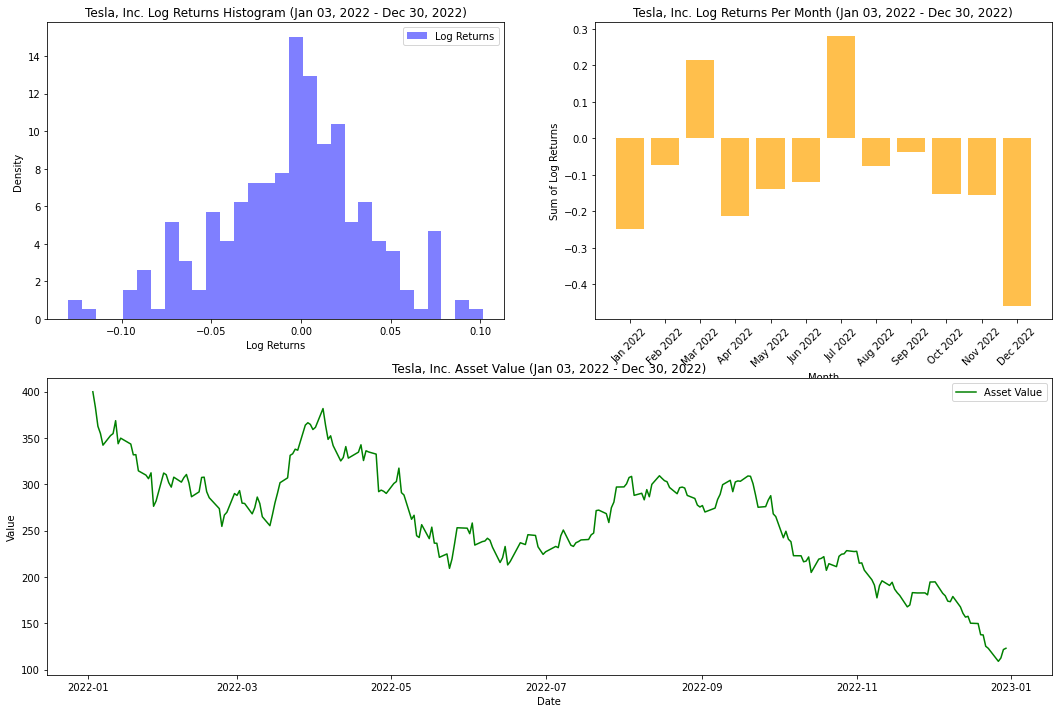

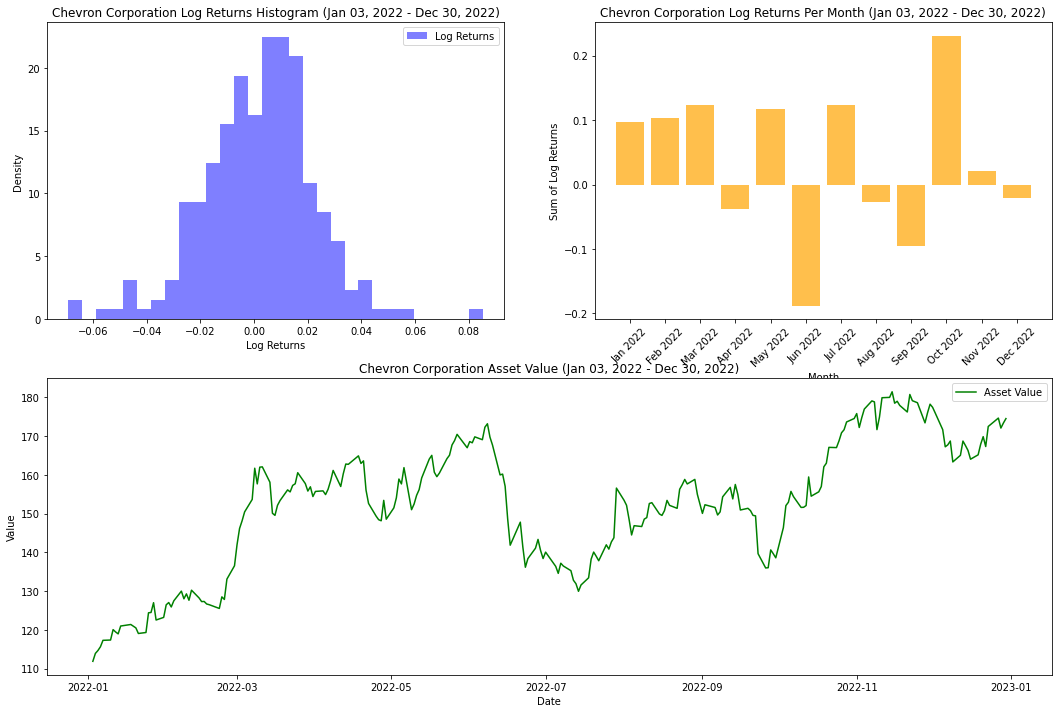

In [3]:
# Calculate log returns
asset_returns = np.log(asset_data["Adj Close"] / asset_data["Adj Close"].shift(1))

# Get the time period for the title
start_date = asset_returns.index[0].strftime('%b %d, %Y')
end_date = asset_returns.index[-1].strftime('%b %d, %Y')
time_period = f"{start_date} - {end_date}"

for asset_ticker in selected_assets:
    asset_name = assets[asset_ticker]
    asset_returns_selected = asset_returns[asset_ticker].dropna()
    
    # Fit a normal distribution to the data
    params = stats.norm.fit(asset_returns_selected)
    
    plt.figure(figsize=(18, 12))
    
    # Plot histogram of log returns
    plt.subplot(2, 2, 1)
    plt.hist(asset_returns_selected, bins=30, density=True, alpha=0.5, color='blue', label='Log Returns')
    plt.title(f"{asset_name} Log Returns Histogram ({time_period})")
    plt.xlabel("Log Returns")
    plt.ylabel("Density")
    plt.legend()
    
    # Plot bar chart of log returns per month
    plt.subplot(2, 2, 2)
    log_returns_monthly = asset_returns_selected.groupby(asset_returns_selected.index.to_period('M')).sum()
    plt.bar(log_returns_monthly.index.strftime('%b %Y'), log_returns_monthly, color='orange', alpha=0.7)
    plt.title(f"{asset_name} Log Returns Per Month ({time_period})")
    plt.xlabel("Month")
    plt.ylabel("Sum of Log Returns")
    plt.xticks(rotation=45)  # Rotate x-axis labels by 45 degrees

    
    # Plot asset values as line curve
    plt.subplot(2, 1, 2)
    plt.plot(asset_data["Adj Close"][asset_ticker], color='green', label='Asset Value')
    plt.title(f"{asset_name} Asset Value ({time_period})")
    plt.xlabel("Date")
    plt.ylabel("Value")
    plt.legend()
        
    # Show the plots for each asset
    plt.show()


# Student's distribution and plot --------------------------------------------------

This code fetches historical price data for selected assets, plots their price trends, calculates log returns, and fits a Student's t-distribution to the log returns for each asset. This analysis can provide insights into the statistical distribution of returns and the fit of the Student's t-distribution as a potential model for the data.

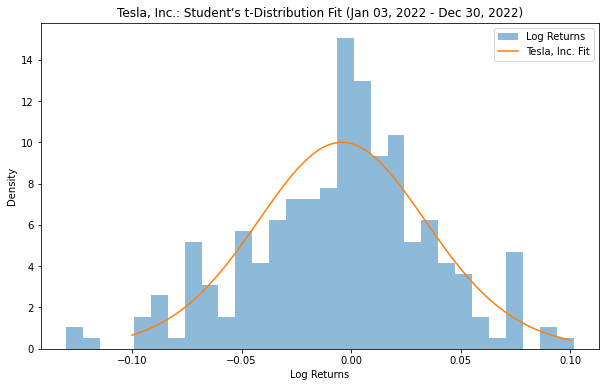

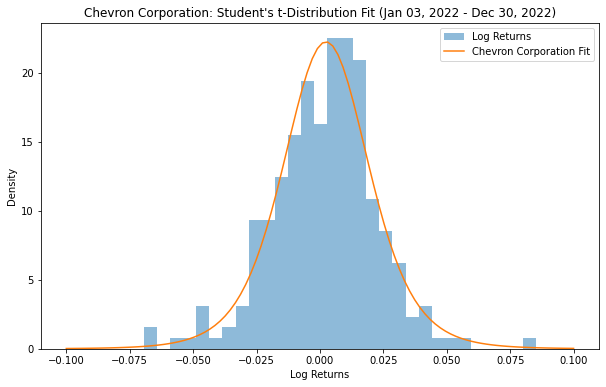

In [4]:
# Fit Student's t-distribution and plot
for asset_ticker in selected_assets:
    asset_name = assets[asset_ticker]
    asset_returns_selected = asset_returns[asset_ticker].dropna()
    params = t.fit(asset_returns_selected)
    
    plt.figure(figsize=(10, 6))
    plt.hist(asset_returns_selected, bins=30, density=True, alpha=0.5, label='Log Returns')
    x = np.linspace(-0.1, 0.1, 100)
    plt.plot(x, t.pdf(x, *params), label=f"{asset_name} Fit")
    plt.legend()
    plt.title(f"{asset_name}: Student's t-Distribution Fit ({time_period})")
    plt.xlabel("Log Returns")
    plt.ylabel("Density")
    plt.show()


# Simulation, calculation, and visualization of elementary volatility and correlation between two simulated asset returns -------------------------------

This code simulates two asset returns, calculates their elementary volatility and correlation, and then visualizes the time series of returns for both assets.

correlation is calculated by using the Pearson correlation coefficient between the returns of two assets, namely 'TSLA' and 'CVX'. The np.corrcoef function computes the correlation matrix for the provided data. The [0, 1] indexing selects the correlation coefficient between the first asset ('TSLA') and the second asset ('CVX') from the correlation matrix.

for the monthly correlation, in the loop "for", the code calculates the correlation between 'TSLA' and 'CVX' returns for each month. The DataFrame is filtered to include only the returns data for each specific month, and then the .corr() function is used to calculate the correlation coefficient between the two assets' returns. The calculated monthly correlations are stored in the monthly_correlations list.

finally the code creates a bar plot showing the monthly correlations between 'TSLA' and 'CVX'. Each bar represents a month, and its height represents the correlation coefficient for that month. The x-axis shows the months, the y-axis shows the correlation values, and the plot is titled accordingly. The rotation=45 argument for plt.xticks() rotates the month labels for better readability. The plot is adjusted for better layout using plt.tight_layout() and then displayed using plt.show().

# Preparing data

In [5]:
import pandas as pd

# Download historical data for TESLA and CHEVRON from Yahoo Finance
tesla_data = yf.download('TSLA', start='2020-01-01', end='2023-01-01')
chevron_data = yf.download('CVX', start='2020-01-01', end='2023-01-01')

# Calculate daily returns
TESLA_returns = tesla_data['Adj Close'].pct_change().dropna()
CHEVRON_returns = chevron_data['Adj Close'].pct_change().dropna()


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


# Correlation calculation and plot

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
Elementary Correlation: 0.16750017679749415


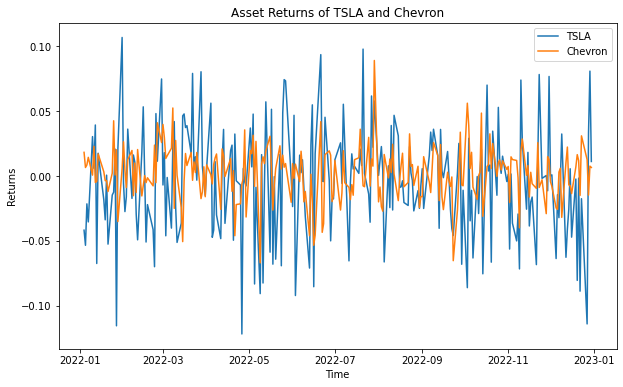

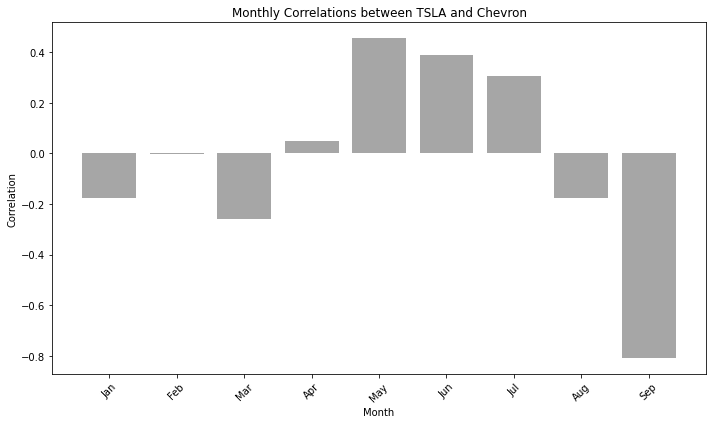

In [6]:

# Download historical data for TSLA and Chevron from Yahoo Finance
tesla_data = yf.download('TSLA', start='2022-01-01', end='2023-01-01')
chevron_data = yf.download('CVX', start='2022-01-01', end='2023-01-01')

# Calculate daily returns
TSLA_returns = tesla_data['Adj Close'].pct_change().dropna()
Chevron_returns = chevron_data['Adj Close'].pct_change().dropna()

# Elementary correlation calculation
correlation_elementary = np.corrcoef(TSLA_returns, Chevron_returns)[0, 1]

# Print elementary correlation
print("Elementary Correlation:", correlation_elementary)

# Plot the elementary volatility for both assets
plt.figure(figsize=(10, 6))
plt.plot(TSLA_returns, label='TSLA')
plt.plot(Chevron_returns, label='Chevron')
plt.xlabel('Time')
plt.ylabel('Returns')
plt.title('Asset Returns of TSLA and Chevron')
plt.legend()
plt.show()

# Create DataFrame with simulated returns
size = len(TSLA_returns)  # Adjust the size based on the length of real returns
dates = pd.date_range(start='2022-01-01', periods=size, freq='D')
returns_df = pd.DataFrame({'TSLA': TSLA_returns, 'Chevron': Chevron_returns}, index=dates)

# Calculate monthly correlations
monthly_correlations = []
for month in range(1, 13):
    month_returns = returns_df[returns_df.index.month == month]
    correlation_monthly = month_returns['TSLA'].corr(month_returns['Chevron'])
    monthly_correlations.append(correlation_monthly)

# Plot monthly correlations
plt.figure(figsize=(10, 6))
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.bar(months, monthly_correlations, color='grey', alpha=0.7)
plt.title('Monthly Correlations between TSLA and Chevron')
plt.xlabel('Month')
plt.ylabel('Correlation')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# EWMA volatility ----------------------------------------------------------

EWMA volatility assigns exponentially decreasing weights to past returns to calculate a weighted moving average of squared deviations from the mean. This approach gives more importance to recent data, making it responsive to changes in volatility over time. 

This code generates simulated returns for two assets, uses GARCH models to estimate Exponentially Weighted Moving Average (EWMA) volatility for each asset, and then visualizes the time series of EWMA volatility for both assets

- EWMA volatility calculation
This section of code calculates the Exponentially Weighted Moving Average (EWMA) volatility for both 'TSLA' and 'CVX' assets. It starts by calculating the sample standard deviation as the initial EWMA volatility estimate. Then, it iterates through the returns, updating the EWMA volatility estimate at each step using the lambda parameter as a weight for the new and old volatility values.


- Elementary correlation calculation:
The code calculates the elementary correlation coefficient between the returns of 'TSLA' and 'CVX'.


- Monthly correlation calculation and plotting:
This portion calculates and plots the monthly correlations between 'TSLA' and 'CVX' assets using EWMA volatility. It creates a DataFrame returns_df containing the returns of both assets, indexed by dates. Then, it iterates through each month, calculates the correlation between the assets' returns, and appends them to the monthly_correlations list. Finally, it creates a bar plot showing the monthly correlations with month labels on the x-axis and correlation values on the y-axis. The plot is titled and adjusted for better layout before being displayed.

Importing Required Libraries:
- `arch.arch_model`: A class from the "arch" library for modeling and estimating financial time series volatility using GARCH models.

In [7]:
from arch import arch_model

# EWMA calculation

In [8]:
# EWMA volatility calculation
lambda_param = 0.94  # Smoothing parameter for EWMA
TSLA_volatility_ewma = np.sqrt(np.sum((TSLA_returns - np.mean(TSLA_returns))**2) / (len(TSLA_returns) - 1))
Chevron_volatility_ewma = np.sqrt(np.sum((Chevron_returns - np.mean(Chevron_returns))**2) / (len(Chevron_returns) - 1))
for i in range(1, len(TSLA_returns)):
    TSLA_volatility_ewma = np.sqrt(lambda_param * TSLA_volatility_ewma**2 + (1 - lambda_param) * (TSLA_returns[i] - np.mean(TSLA_returns))**2)
    Chevron_volatility_ewma = np.sqrt(lambda_param * Chevron_volatility_ewma**2 + (1 - lambda_param) * (Chevron_returns[i] - np.mean(Chevron_returns))**2)

# Elementary correlation calculation
correlation_elementary = np.corrcoef(TSLA_returns, Chevron_returns)[0, 1]

print("EWMA Volatility of TSLA:", TSLA_volatility_ewma)
print("EWMA Volatility of Chevron:", Chevron_volatility_ewma)
print("Elementary Correlation:", correlation_elementary)


EWMA Volatility of TSLA: 0.049720622748143935
EWMA Volatility of Chevron: 0.01626968945257231
Elementary Correlation: 0.16750017679749415


/var/folders/tv/3lv1xvs16j11_52x2s81rfdr0000gn/T/ipykernel_962/1684866433.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  TSLA_volatility_ewma = np.sqrt(lambda_param * TSLA_volatility_ewma**2 + (1 - lambda_param) * (TSLA_returns[i] - np.mean(TSLA_returns))**2)
/var/folders/tv/3lv1xvs16j11_52x2s81rfdr0000gn/T/ipykernel_962/1684866433.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Chevron_volatility_ewma = np.sqrt(lambda_param * Chevron_volatility_ewma**2 + (1 - lambda_param) * (Chevron_returns[i] - np.mean(Chevron_returns))**2)


# Plot

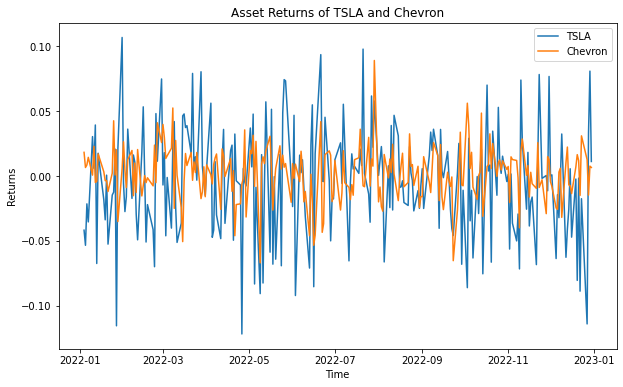

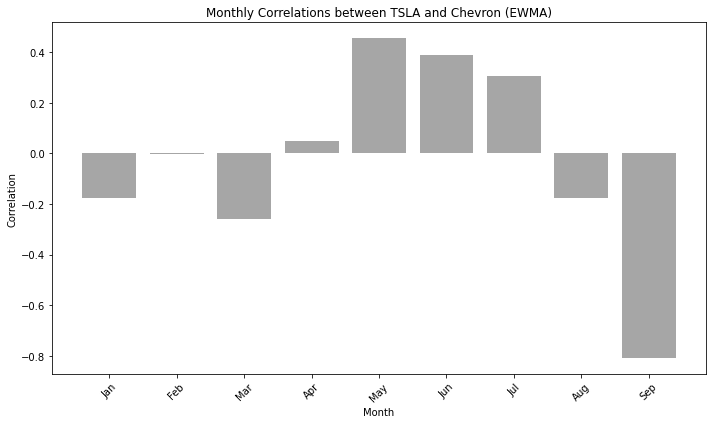

In [9]:
# Plot the asset returns
plt.figure(figsize=(10, 6))
plt.plot(TSLA_returns, label='TSLA')
plt.plot(Chevron_returns, label='Chevron')
plt.xlabel('Time')
plt.ylabel('Returns')
plt.title('Asset Returns of TSLA and Chevron')
plt.legend()
plt.show()

# Monthly correlation calculation
dates = pd.date_range(start='2022-01-01', periods=len(TSLA_returns), freq='D')
returns_df = pd.DataFrame({'TSLA': TSLA_returns, 'Chevron': Chevron_returns}, index=dates)

monthly_correlations = []
for month in range(1, 13):
    month_returns = returns_df[returns_df.index.month == month]
    correlation_monthly = month_returns['TSLA'].corr(month_returns['Chevron'])
    monthly_correlations.append(correlation_monthly)

# Plot monthly correlations
plt.figure(figsize=(10, 6))
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.bar(months, monthly_correlations, color='grey', alpha=0.7)
plt.title('Monthly Correlations between TSLA and Chevron (EWMA)')
plt.xlabel('Month')
plt.ylabel('Correlation')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# GARCH model ----------------------------------------------------------


GARCH (Generalized Autoregressive Conditional Heteroskedasticity) is a statistical model used to capture and model the volatility of financial time series data.
GARCH models are designed to account for the phenomenon of heteroskedasticity, which is the tendency for the variability of a time series to change over time.

The main idea behind GARCH models is that they model the conditional variance of a time series, which allows them to capture time-varying volatility patterns. The model assumes that the observed series is a function of both past values and past volatility.

The code simulates returns for two assets, fits GARCH models to estimate conditional volatility, calculates conditional correlation, and then plots the conditional volatilities of the assets over time.


- Fit GARCH(1,1) Models:

GARCH(1,1) models are fitted to both the 'TSLA' and 'CVX' returns using the arch_model function. The models are specified with parameters p=1 and q=1, indicating that they are GARCH(1,1) models. The fitted models are stored in garch_result_TSLA and garch_result_CVX.


- GARCH(1,1) Volatility calculation:
These lines calculate the GARCH(1,1) volatility for both 'TSLA' and 'CVX' assets. The volatility values are obtained from the conditional_volatility attribute of the fitted GARCH models.

# Import library

This line imports the arch_model function from the arch library, which is used to estimate ARCH and GARCH models for financial time series data.

In [10]:
from arch import arch_model

# Calculation

In [11]:
# Fit GARCH(1,1) models to calculate conditional volatility for both assets
garch_model_TSLA = arch_model(TSLA_returns, vol="Garch", p=1, q=1)
garch_result_TSLA = garch_model_TSLA.fit()

garch_model_Chevron = arch_model(Chevron_returns, vol="Garch", p=1, q=1)
garch_result_Chevron = garch_model_Chevron.fit()

# GARCH(1,1) volatility calculation
TSLA_volatility_garch = np.sqrt(garch_result_TSLA.conditional_volatility[-1])
Chevron_volatility_garch = np.sqrt(garch_result_Chevron.conditional_volatility[-1])

# Elementary correlation calculation
correlation_elementary = np.corrcoef(TSLA_returns, Chevron_returns)[0, 1]

print("GARCH(1,1) Volatility of TSLA:", TSLA_volatility_garch)
print("GARCH(1,1) Volatility of Chevron:", Chevron_volatility_garch)
print("Elementary Correlation:", correlation_elementary)


Iteration:      1,   Func. Count:      6,   Neg. LLF: 3840.5155994444285
Iteration:      2,   Func. Count:     16,   Neg. LLF: 268.54592020993954
Iteration:      3,   Func. Count:     26,   Neg. LLF: 823.3567080112879
Iteration:      4,   Func. Count:     33,   Neg. LLF: -442.1782352049855
Iteration:      5,   Func. Count:     39,   Neg. LLF: -442.18512970289567
Iteration:      6,   Func. Count:     45,   Neg. LLF: -442.1873863660185
Iteration:      7,   Func. Count:     51,   Neg. LLF: -435.3522883557756
Iteration:      8,   Func. Count:     57,   Neg. LLF: -442.06394518617196
Iteration:      9,   Func. Count:     63,   Neg. LLF: -443.578361326038
Iteration:     10,   Func. Count:     69,   Neg. LLF: -443.7570431483455
Iteration:     11,   Func. Count:     75,   Neg. LLF: -443.7616655824879
Iteration:     12,   Func. Count:     80,   Neg. LLF: -443.7616643288967
Iteration:     13,   Func. Count:     86,   Neg. LLF: -443.7617369514643
Iteration:     14,   Func. Count:     91,   Neg. LL

/Users/cash/opt/anaconda3/lib/python3.9/site-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.001687. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Users/cash/opt/anaconda3/lib/python3.9/site-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0004292. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/var/folders/tv/3lv1xvs16j11_52x2s81rfdr0000gn/T/ipykern

# Plot

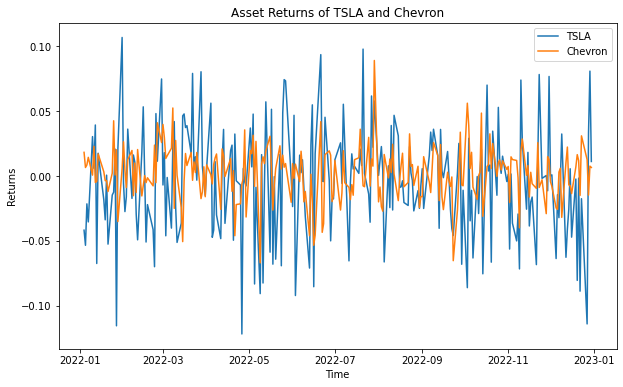

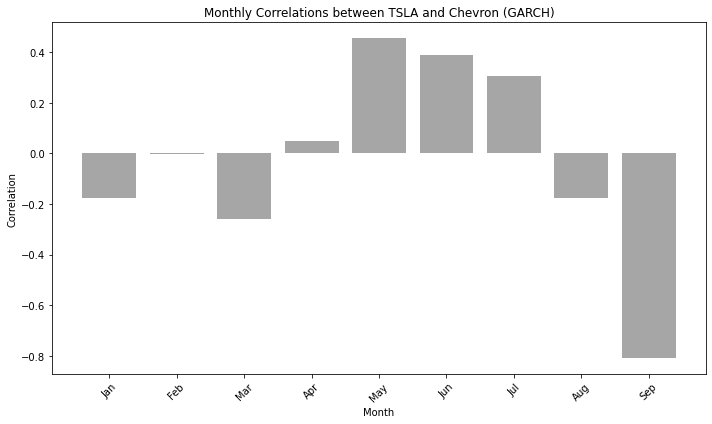

In [12]:
# Plot the asset returns
plt.figure(figsize=(10, 6))
plt.plot(TSLA_returns, label='TSLA')
plt.plot(Chevron_returns, label='Chevron')
plt.xlabel('Time')
plt.ylabel('Returns')
plt.title('Asset Returns of TSLA and Chevron')
plt.legend()
plt.show()

# Monthly correlation calculation
dates = pd.date_range(start='2022-01-01', periods=len(TSLA_returns), freq='D')
returns_df = pd.DataFrame({'TSLA': TSLA_returns, 'Chevron': Chevron_returns}, index=dates)

monthly_correlations = []
for month in range(1, 13):
    month_returns = returns_df[returns_df.index.month == month]
    correlation_monthly = month_returns['TSLA'].corr(month_returns['Chevron'])
    monthly_correlations.append(correlation_monthly)

# Plot monthly correlations
plt.figure(figsize=(10, 6))
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.bar(months, monthly_correlations, color='grey', alpha=0.7)
plt.title('Monthly Correlations between TSLA and Chevron (GARCH)')
plt.xlabel('Month')
plt.ylabel('Correlation')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Comparing the 3 models ---------------------------------------------------------

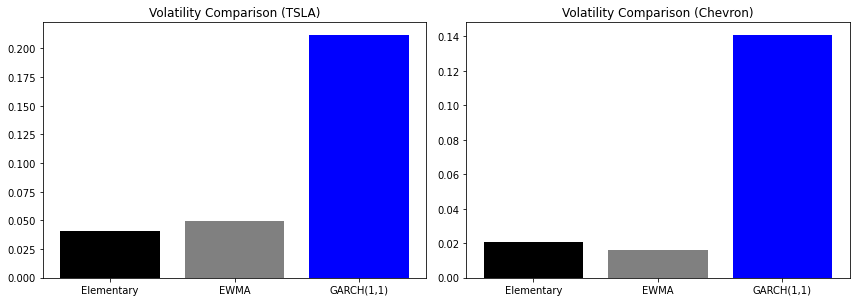

In [13]:
# Calculate the standard deviation of returns
TSLA_std = np.std(TSLA_returns)
Chevron_std = np.std(Chevron_returns)

# Volatility Comparison
plt.figure(figsize=(12, 8))  # Adjust the figure size

plt.subplot(2, 2, 1)
methods = ['Elementary', 'EWMA', 'GARCH(1,1)']
volatilities = [TSLA_std, TSLA_volatility_ewma, TSLA_volatility_garch]
plt.bar(methods, volatilities, color=['black', 'grey', 'blue'])
plt.title("Volatility Comparison (TSLA)")

plt.subplot(2, 2, 2)
volatilities = [Chevron_std, Chevron_volatility_ewma, Chevron_volatility_garch]
plt.bar(methods, volatilities, color=['black', 'grey', 'blue'])
plt.title("Volatility Comparison (Chevron)")

plt.tight_layout()  # Ensure proper spacing
plt.show()


# VAR and ES calculation ----------------------------------------------------------

This code is a simulation of calculating Value at Risk (VaR) and Expected Shortfall (ES) for a portfolio consisting of two assets (AAPL and MSFT) using both Historical Simulation and the Parametric Method. The code then visualizes the results using bar plots.

# Import library
The norm class in SciPy is used to work with normal distributions

In [14]:
from scipy.stats import norm

# Calculate VaR and ES using Historical Simulation for each asset

In [15]:
# Confidence level
confidence_level = 0.98

# Calculate separate VaR and ES using Historical Simulation for TSLA
TSLA_var_hs = -np.percentile(TSLA_returns, (1 - confidence_level) * 100)
TSLA_es_hs = -np.mean(TSLA_returns[TSLA_returns <= -TSLA_var_hs])

print(f'TSLA VaR (HS): {TSLA_var_hs:.4f}')
print(f'TSLA ES (HS): {TSLA_es_hs:.4f}')


# Calculate separate VaR and ES using Historical Simulation for Chevron
Chevron_var_hs = -np.percentile(Chevron_returns, (1 - confidence_level) * 100)
Chevron_es_hs = -np.mean(Chevron_returns[Chevron_returns <= -Chevron_var_hs])

print(f'Chevron VaR (HS): {Chevron_var_hs:.4f}')
print(f'Chevron ES (HS): {Chevron_es_hs:.4f}')


TSLA VaR (HS): 0.0889
TSLA ES (HS): 0.1069
Chevron VaR (HS): 0.0460
Chevron ES (HS): 0.0565


# Calculate VaR and ES using Parametric Method for each asset

In [16]:
# Calculate separate VaR and ES using Parametric Method for TSLA
TSLA_mean = np.mean(TSLA_returns)
TSLA_std = np.std(TSLA_returns)

TSLA_var_param = norm.ppf(1 - confidence_level, TSLA_mean, TSLA_std) * np.sqrt(252)
TSLA_es_param = -TSLA_mean - TSLA_std * norm.pdf(norm.ppf(1 - confidence_level)) / (1 - confidence_level) * np.sqrt(252)
print(f'TSLA VaR (Parametric): {TSLA_var_param:.2f}')
print(f'TSLA ES (Parametric): {TSLA_es_param:.2f}')


# Calculate separate VaR and ES using Parametric Method for Chevron
Chevron_mean = np.mean(Chevron_returns)
Chevron_std = np.std(Chevron_returns)

Chevron_var_param = norm.ppf(1 - confidence_level, Chevron_mean, Chevron_std) * np.sqrt(252)
Chevron_es_param = -Chevron_mean - Chevron_std * norm.pdf(norm.ppf(1 - confidence_level)) / (1 - confidence_level) * np.sqrt(252)

print(f'Chevron VaR (Parametric): {Chevron_var_param:.2f}')
print(f'Chevron ES (Parametric): {Chevron_es_param:.2f}')


TSLA VaR (Parametric): -1.40
TSLA ES (Parametric): -1.57
Chevron VaR (Parametric): -0.64
Chevron ES (Parametric): -0.80


# Calculate portfolio values

In [17]:
# Calculate portfolio returns and weights
portfolio_returns = 0.5 * TSLA_returns + 0.5 * Chevron_returns
portfolio_mean = np.mean(portfolio_returns)
portfolio_std = np.std(portfolio_returns)

# Portfolio VaR and ES using Historical Simulation
portfolio_var_hs = -np.percentile(portfolio_returns, (1 - confidence_level) * 100)
portfolio_es_hs = -np.mean(portfolio_returns[portfolio_returns <= -portfolio_var_hs])

# Portfolio VaR and ES using Parametric Method
portfolio_var_param = norm.ppf(1 - confidence_level, portfolio_mean, portfolio_std) * np.sqrt(252)
portfolio_es_param = -portfolio_mean - portfolio_std * norm.pdf(norm.ppf(1 - confidence_level)) / (1 - confidence_level) * np.sqrt(252)


# Plot results of each asset

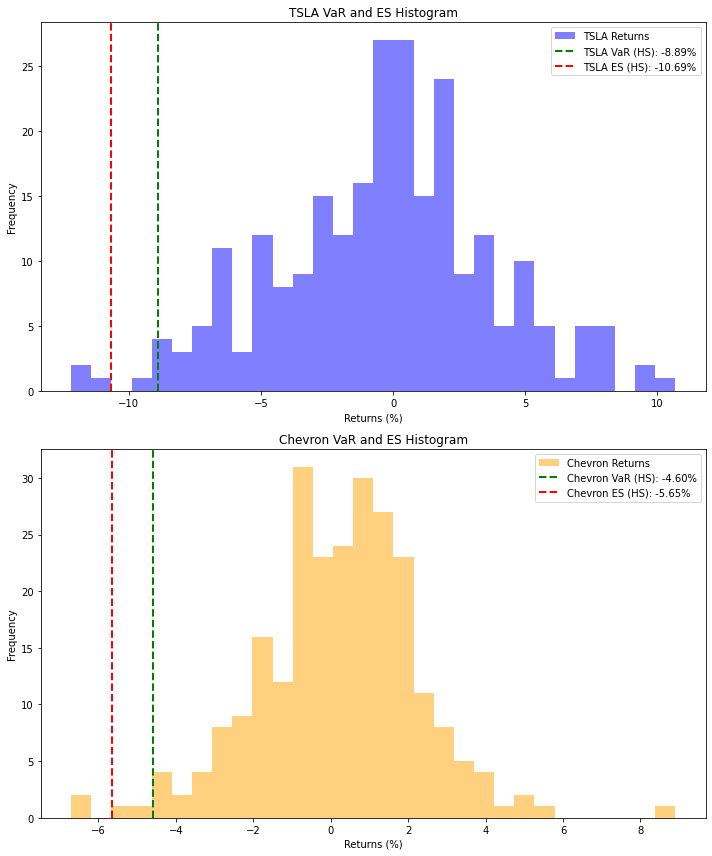

In [18]:
# Convert returns and VaR/ES values to percentages
TSLA_returns_percent = TSLA_returns * 100
TSLA_var_hs_percent = -TSLA_var_hs * 100
TSLA_es_hs_percent = -TSLA_es_hs * 100

Chevron_returns_percent = Chevron_returns * 100
Chevron_var_hs_percent = -Chevron_var_hs * 100
Chevron_es_hs_percent = -Chevron_es_hs * 100

# Histogram for Separate VaR and ES
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12))

# TSLA Histogram
ax1.hist(TSLA_returns_percent, bins=30, color='blue', alpha=0.5, label='TSLA Returns')
ax1.axvline(TSLA_var_hs_percent, color='green', linestyle='dashed', linewidth=2, label=f'TSLA VaR (HS): {TSLA_var_hs_percent:.2f}%')
ax1.axvline(TSLA_es_hs_percent, color='red', linestyle='dashed', linewidth=2, label=f'TSLA ES (HS): {TSLA_es_hs_percent:.2f}%')
ax1.legend()
ax1.set_title('TSLA VaR and ES Histogram')
ax1.set_xlabel('Returns (%)')
ax1.set_ylabel('Frequency')

# Chevron Histogram
ax2.hist(Chevron_returns_percent, bins=30, color='orange', alpha=0.5, label='Chevron Returns')
ax2.axvline(Chevron_var_hs_percent, color='green', linestyle='dashed', linewidth=2, label=f'Chevron VaR (HS): {Chevron_var_hs_percent:.2f}%')
ax2.axvline(Chevron_es_hs_percent, color='red', linestyle='dashed', linewidth=2, label=f'Chevron ES (HS): {Chevron_es_hs_percent:.2f}%')
ax2.legend()
ax2.set_title('Chevron VaR and ES Histogram')
ax2.set_xlabel('Returns (%)')
ax2.set_ylabel('Frequency')

plt.tight_layout()
plt.show()


# Plot results of portfolio

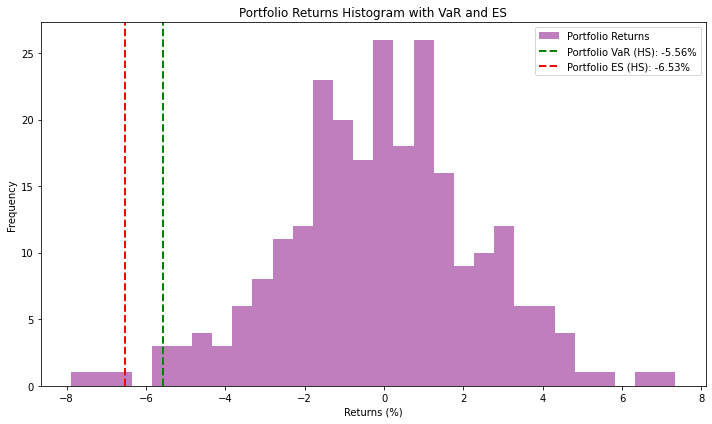

In [19]:
# Calculate portfolio returns as equal weighted combination of TSLA and Chevron returns
portfolio_returns = 0.5 * TSLA_returns + 0.5 * Chevron_returns

# Convert portfolio returns to percentages
portfolio_returns_percent = portfolio_returns * 100

# Calculate portfolio VaR and ES using Historical Simulation
portfolio_var_hs = -np.percentile(portfolio_returns, (1 - confidence_level) * 100)
portfolio_es_hs = -np.mean(portfolio_returns[portfolio_returns <= -portfolio_var_hs])

# Create a histogram for portfolio returns
plt.figure(figsize=(10, 6))
plt.hist(portfolio_returns_percent, bins=30, color='purple', alpha=0.5, label='Portfolio Returns')
plt.axvline(-portfolio_var_hs * 100, color='green', linestyle='dashed', linewidth=2, label=f'Portfolio VaR (HS): {-portfolio_var_hs * 100:.2f}%')
plt.axvline(-portfolio_es_hs * 100, color='red', linestyle='dashed', linewidth=2, label=f'Portfolio ES (HS): {-portfolio_es_hs * 100:.2f}%')
plt.title('Portfolio Returns Histogram with VaR and ES')
plt.xlabel('Returns (%)')
plt.ylabel('Frequency')
plt.legend()
plt.tight_layout()
plt.show()


# Copula ----------------------------------------------------------

Copula provides a way to model the joint distribution of variables while separating the marginal distributions (individual distributions of each variable) from their dependence structure.

In this context, copulas are often used to model the dependence between asset returns, capturing the correlation between different assets' price movements while allowing flexibility in modeling the individual marginal distributions.

The code illustrates how a Gaussian copula can be used to generate joint daily returns for a portfolio of two assets (TSLA and CVX) with a specified correlation structure. This approach is used to simulate the dependence between asset returns while considering the volatility dynamics captured by GARCH models. Copula models are used to capture the dependence structure between random variables. The scatter plot of joint returns helps visualize the simulated correlation between the two assets.

# Import library
scipy.stats module provides a collection of classes and functions for working with various statistical distributions and related operations. The t class in scipy.stats represents the Student's t-distribution. 

In [20]:
from scipy.stats import t, multivariate_normal

# Calculate

In [21]:
# Calculate correlation and cov_matrix for the Gaussian copula
correlation_copula = np.corrcoef(TSLA_returns, Chevron_returns)[0, 1]
cov_matrix = np.array([[1.0, correlation_copula], [correlation_copula, 1.0]])

# Generate random samples from the bivariate Gaussian copula
np.random.seed(42)
copula_samples = multivariate_normal.rvs(mean=[0, 0], cov=cov_matrix, size=len(TSLA_returns))


# Plot results

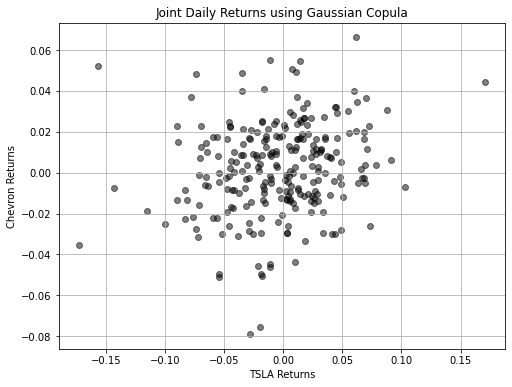

In [22]:
degree_of_freedom_TSLA = 10  
mean_TSLA = np.mean(TSLA_returns)
std_dev_TSLA = np.std(TSLA_returns)
scale_TSLA = std_dev_TSLA  

degree_of_freedom_Chevron = 10 
mean_Chevron = np.mean(Chevron_returns)
std_dev_Chevron = np.std(Chevron_returns)
scale_Chevron = std_dev_Chevron
           
# Convert copula samples to joint daily returns using Student's t distributions
TSLA_copula_returns = t.ppf(np.clip(multivariate_normal.cdf(copula_samples[:, 0], mean=0, cov=1), 1e-6, 1-1e-6), degree_of_freedom_TSLA, mean_TSLA, scale_TSLA)
Chevron_copula_returns = t.ppf(np.clip(multivariate_normal.cdf(copula_samples[:, 1], mean=0, cov=1), 1e-6, 1-1e-6), degree_of_freedom_Chevron, mean_Chevron, scale_Chevron)

# Plot the joint daily returns
plt.figure(figsize=(8, 6))
plt.scatter(TSLA_copula_returns, Chevron_copula_returns, color='black', alpha=0.5)
plt.xlabel('TSLA Returns')
plt.ylabel('Chevron Returns')
plt.title('Joint Daily Returns using Gaussian Copula')
plt.grid()
plt.show()
